# Lead Scoring Case Study
## X Education- Logistic regression - Assignment

# Problem Statement

An education company named X Education sells online courses to industry professionals. On any given day, many professionals who are interested in the courses land on their website and browse for courses. 
 

The company markets its courses on several websites and search engines like Google. Once these people land on the website, they might browse the courses or fill up a form for the course or watch some videos. When these people fill up a form providing their email address or phone number, they are classified to be a lead. Moreover, the company also gets leads through past referrals. Once these leads are acquired, employees from the sales team start making calls, writing emails, etc. Through this process, some of the leads get converted while most do not. The typical lead conversion rate at X education is around 3


 

Now, although X Education gets a lot of leads, its lead conversion rate is very poor. For example, if, say, they acquire 100 leads in a day, only about 30 of them are converted. To make this process more efficient, the company wishes to identify the most potential leads, also known as ‘Hot Leads’. If they successfully identify this set of leads, the lead conversion rate should go up as the sales team will now be focusing more on communicating with the potential leads rather than making calls to ev
as a funnel
As you can see, there are a lot of leads generated in the initial stage (top) but only a few of them come out as paying customers from the bottom. In the middle stage, you need to nurture the potential leads well (i.e. educating the leads about the product, constantly communicating etc. ) in order to get a higher lead version.

 

X Education has appointed you to help them select the most promising leads, i.e. the leads that are most likely to convert into paying customers. The company requires you to build a model wherein you need to assign a lead score to each of the leads such that the customers with a higher lead score have a higher conversion chance and the customers with a lower lead score have a lower conversion chance. The CEO, in particular, has given a ballpark of the target lead conversion rate tl value (think why?).

## Business Goal:

- Build a logistic regression model to assign a lead score between 0 and 100 to each of the leads which can be used by the company to target potential leads. A higher score would mean that the lead is hot, i.e. is most likely to convert whereas a lower score would mean that the lead is cold and will mostly not get converted.
- 
There are some more problems presented by the company which your model should be able to adjust to if the company's requirement changes in the future so you will need to handle these as well. These problems are provided in a separate doc file. Please fill it based on the logistic regression model you got in the first step. Also, make sure you include this in your final PPT where you'll make recommendations.

### 1. Data Understanding and Exploration

##### Importing the libraries.

In [8]:
#import the warnings.
import warnings
warnings.filterwarnings("ignore")

In [9]:
# Import 'numpy' and 'pandas' for working with numbers and data frames:
import pandas as pd, numpy as np

In [10]:
# read the dataset of "leads.csv" as "leads":
leads = pd.read_csv("leads.csv")
leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [11]:
# Now let's check the number of rows and columns in the "leads" dataset:
leads.shape

(9240, 37)

In [12]:
# Checking the feature names in the dataset:
leads.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'How did you hear about X Education',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags', 'Lead Quality',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'Lead Profile', 'City', 'Asymmetrique Activity Index',
       'Asymmetrique Profile Index', 'Asymmetrique Activity Score',
       'Asymmetrique Profile Score',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [13]:
# Getting insights from the features using describe:
leads.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [14]:
# Getting the summary of the dataset for all the rows,columns & non-null values:
leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

It looks like the dataset includes several categorical variables that will require dummy variable creation, and there are numerous null values that will need proper handling.

### 2: Data Cleaning and Preparation

In [17]:
# Check the number of missing values in each column
#Sorting the values to descenting order for clear understanding:
leads.isna().sum().sort_values(ascending=False)

Lead Quality                                     4767
Asymmetrique Activity Index                      4218
Asymmetrique Profile Score                       4218
Asymmetrique Activity Score                      4218
Asymmetrique Profile Index                       4218
Tags                                             3353
Lead Profile                                     2709
What matters most to you in choosing a course    2709
What is your current occupation                  2690
Country                                          2461
How did you hear about X Education               2207
Specialization                                   1438
City                                             1420
Page Views Per Visit                              137
TotalVisits                                       137
Last Activity                                     103
Lead Source                                        36
Receive More Updates About Our Courses              0
I agree to pay the amount th

As you can see there are a lot of columns which have high number of missing values and these columns are not useful. Since, there are 9000+ datapoints in our dataframe, let's eliminate the columns having greater than 3000 missing values as they are of no use to us.

In [19]:
# Drop all the columns in which greater than 3000 missing values are present
#  certain threshold percentage, imputing the missing values, etc.

for col in leads.columns:
    if leads[col].isna().sum() > 3000:
        leads.drop(col, axis=1, inplace=True)

In [20]:
# verifing the Dataset to check for null values:
leads.isna().sum().sort_values(ascending=False)

What matters most to you in choosing a course    2709
Lead Profile                                     2709
What is your current occupation                  2690
Country                                          2461
How did you hear about X Education               2207
Specialization                                   1438
City                                             1420
Page Views Per Visit                              137
TotalVisits                                       137
Last Activity                                     103
Lead Source                                        36
Get updates on DM Content                           0
Newspaper                                           0
I agree to pay the amount through cheque            0
A free copy of Mastering The Interview              0
Update me on Supply Chain Content                   0
Receive More Updates About Our Courses              0
Through Recommendations                             0
Digital Advertisement       

Upon reviewing the columns we have noticed that columns "City" & "Country" are not an impactful players in our model. Hence, we drop of them.

In [22]:
#Dropping column "City" & "Country":
leads.drop(['City', 'Country'], axis=1, inplace=True)

In [23]:
#Now let's check the percentage of missing values:
(leads.isna().sum() / leads.shape[0] * 100).round(2).sort_values(ascending=False)

What matters most to you in choosing a course    29.32
Lead Profile                                     29.32
What is your current occupation                  29.11
How did you hear about X Education               23.89
Specialization                                   15.56
TotalVisits                                       1.48
Page Views Per Visit                              1.48
Last Activity                                     1.11
Lead Source                                       0.39
Get updates on DM Content                         0.00
Update me on Supply Chain Content                 0.00
X Education Forums                                0.00
I agree to pay the amount through cheque          0.00
A free copy of Mastering The Interview            0.00
Receive More Updates About Our Courses            0.00
Through Recommendations                           0.00
Digital Advertisement                             0.00
Newspaper                                         0.00
Prospect I

In [24]:
#Let's check the null values again:
leads.isna().sum().sort_values(ascending=False)

What matters most to you in choosing a course    2709
Lead Profile                                     2709
What is your current occupation                  2690
How did you hear about X Education               2207
Specialization                                   1438
TotalVisits                                       137
Page Views Per Visit                              137
Last Activity                                     103
Lead Source                                        36
Get updates on DM Content                           0
Update me on Supply Chain Content                   0
X Education Forums                                  0
I agree to pay the amount through cheque            0
A free copy of Mastering The Interview              0
Receive More Updates About Our Courses              0
Through Recommendations                             0
Digital Advertisement                               0
Newspaper                                           0
Prospect ID                 

Some columns have a 'Select' option, indicating that the student didn’t choose an option for that field. These 'Select' entries essentially represent missing values, so we need to check how often 'Select' appears in each relevant column.

In [26]:
# Get the value counts of all the columns
for col in leads:
    print(leads[col].astype('category').value_counts())

Prospect ID
000104b9-23e4-4ddc-8caa-8629fe8ad7f4    1
a7a319ea-b6ae-4c6b-afc5-183b933d10b5    1
aa27a0af-eeab-4007-a770-fa8a93fa53c8    1
aa30ebb2-8476-41ce-9258-37cc025110d3    1
aa405742-17ac-4c65-b19e-ab91c241cc53    1
                                       ..
539eb309-df36-4a89-ac58-6d3651393910    1
539ffa32-1be7-4fe1-b04c-faf1bab763cf    1
53aabd84-5dcc-4299-bbe3-62f3764b07b1    1
53ac14bd-2bb2-4315-a21c-94562d1b6b2d    1
fffb0e5e-9f92-4017-9f42-781a69da4154    1
Name: count, Length: 9240, dtype: int64
Lead Number
579533    1
629593    1
630390    1
630403    1
630405    1
         ..
602534    1
602540    1
602557    1
602561    1
660737    1
Name: count, Length: 9240, dtype: int64
Lead Origin
Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: count, dtype: int64
Lead Source
Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search

The following three columns now have the level 'Select'. Let's check them once again.

In [28]:
# Then we will apply value count to the Lead profile column:
leads['Lead Profile'].astype('category').value_counts()

Lead Profile
Select                         4146
Potential Lead                 1613
Other Leads                     487
Student of SomeSchool           241
Lateral Student                  24
Dual Specialization Student      20
Name: count, dtype: int64

In [29]:
# Then we will apply value count to the "How did you hear about X Education" column:
leads['How did you hear about X Education'].astype('category').value_counts()

How did you hear about X Education
Select                   5043
Online Search             808
Word Of Mouth             348
Student of SomeSchool     310
Other                     186
Multiple Sources          152
Advertisements             70
Social Media               67
Email                      26
SMS                        23
Name: count, dtype: int64

In [30]:
# Then we will apply value count to the Specialization column:
leads['Specialization'].astype('category').value_counts()

Specialization
Select                               1942
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Media and Advertising                 203
Travel and Tourism                    203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: count, dtype: int64

Upon verifying the columns Lead Profile and How did you hear about X Education contain many rows with the value Select, which doesn’t contribute to our analysis. It would be best to drop these rows to improve the quality of our data.

In [32]:
# In this case let's dripp the Lead profile and How did you hear about X Education:
leads.drop(['Lead Profile', 'How did you hear about X Education'], axis=1, inplace=True)

I noticed that in the value counts for several columns, a single value dominated most of the data points. These columns include Do Not Call, Search, Magazine, Newspaper Article, X Education Forums, Newspaper, Digital Advertisement, Through Recommendations, Receive More Updates About Our Courses, Update me on Supply Chain Content, Get updates on DM Content, and I agree to pay the amount through cheque. Since nearly all the entries in these columns are No, it makes sense to drop them, as they won't contribute to our analysis.

In [34]:
# Let's go ahead and drop all the columns as listed above:
leads.drop(columns=[
    'Do Not Call',
    'Search',
    'Magazine',
    'Newspaper Article',
    'X Education Forums',
    'Newspaper',
    'Digital Advertisement',
    'Through Recommendations',
    'Receive More Updates About Our Courses',
    'Update me on Supply Chain Content',
    'Get updates on DM Content',
    'I agree to pay the amount through cheque'
], axis=1, inplace=True)

The variable What matters most to you in choosing a course has the option Better Career Prospects appearing a whopping 6,528 times, while the other two options show up only once or twice. Given this overwhelming imbalance, it would be best to drop this column as well.

In [36]:
# Now let's check the value counts for What matters most to you in choosing a course:
leads['What matters most to you in choosing a course'].astype('category').value_counts()
leads = leads.drop('What matters most to you in choosing a course', axis=1)


In [37]:
# Now check the number of null values again:
leads.isna().sum().sort_values(ascending=False)

What is your current occupation           2690
Specialization                            1438
TotalVisits                                137
Page Views Per Visit                       137
Last Activity                              103
Lead Source                                 36
Prospect ID                                  0
Lead Number                                  0
Lead Origin                                  0
Do Not Email                                 0
Converted                                    0
Total Time Spent on Website                  0
A free copy of Mastering The Interview       0
Last Notable Activity                        0
dtype: int64

Since now the number of null values present in the columns are quite small we can simply drop the rows in which these null values are present.

In [39]:
# Let's drop the null value rows in the column 'TotalVisits':
leads = leads[ ~pd.isnull(leads['TotalVisits']) ]

In [40]:
# Now check the number of null values again:
leads.isna().sum().sort_values(ascending=False)

What is your current occupation           2683
Specialization                            1431
Lead Source                                 29
Prospect ID                                  0
Lead Number                                  0
Lead Origin                                  0
Do Not Email                                 0
Converted                                    0
TotalVisits                                  0
Total Time Spent on Website                  0
Page Views Per Visit                         0
Last Activity                                0
A free copy of Mastering The Interview       0
Last Notable Activity                        0
dtype: int64

In [41]:
# Let's drop the null value rows in the column 'Lead Source':
leads = leads[ ~pd.isnull(leads['Lead Source']) ]

In [42]:
# Now check the number of null values again:
leads.isna().sum().sort_values(ascending=False)

What is your current occupation           2683
Specialization                            1431
Prospect ID                                  0
Lead Number                                  0
Lead Origin                                  0
Lead Source                                  0
Do Not Email                                 0
Converted                                    0
TotalVisits                                  0
Total Time Spent on Website                  0
Page Views Per Visit                         0
Last Activity                                0
A free copy of Mastering The Interview       0
Last Notable Activity                        0
dtype: int64

Now your data doesn't have any null values. Let's now check the percentage of rows that we have retained.

In [44]:
# Checking the percentage of the row:
print(len(leads.index))
print(len(leads.index)/9240)

9074
0.982034632034632


In [45]:
# So we have 69% of rows which seems good enough:
# Now let's check the Dataset again:
leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,0,0.0,0,0.0,Page Visited on Website,Select,Unemployed,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,0,5.0,674,2.5,Email Opened,Select,Unemployed,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,1,2.0,1428,1.0,Converted to Lead,Select,Unemployed,No,Modified


As we see the variables `Prospect ID` and `Lead Number` won't be of any use in the analysis, so it's best that we drop these two variables.

In [47]:
# Dropping the 'Prospect ID' and 'Lead Number' columns:
leads.drop(columns=['Prospect ID', 'Lead Number'], inplace=True)

In [48]:
# Let's check the dataset again:
leads.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,0,0.0,0,0.0,Page Visited on Website,Select,Unemployed,No,Modified
1,API,Organic Search,No,0,5.0,674,2.5,Email Opened,Select,Unemployed,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,No,Modified
4,Landing Page Submission,Google,No,1,2.0,1428,1.0,Converted to Lead,Select,Unemployed,No,Modified


### 3. Dummy Variable Creation:

The next step is to address the categorical variables in our dataset. Let’s start by identifying which variables are categorical.

In [51]:
# Check the columns which are of type 'object'
temp = leads.loc[:, leads.dtypes == 'object']
temp.columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Last Activity',
       'Specialization', 'What is your current occupation',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [52]:
# Create dummy variables using the 'get_dummies':
dummy = pd.get_dummies(leads[['Lead Origin', 'Lead Source', 'Do Not Email', 'Last Activity',
                              'What is your current occupation','A free copy of Mastering The Interview', 
                              'Last Notable Activity']], drop_first=True, dtype=int)

# Add the results to the master dataframe
leads = pd.concat([leads, dummy], axis=1)

In [53]:
# Creating dummy variable separately for the variable 'Specialization' since it has the level 'Select':
dummy_spl = pd.get_dummies(leads['Specialization'], dtype=int)
if 'Specialization_Select' in dummy_spl.columns:
    dummy_spl = dummy_spl.drop(['Specialization_Select'], axis=1)
leads = pd.concat([leads, dummy_spl], axis=1)

In [54]:
# Drop the variables for which the dummy variables have been created
leads = leads.drop(['Lead Origin', 'Lead Source', 'Do Not Email', 'Last Activity',
                   'Specialization', 'What is your current occupation',
                   'A free copy of Mastering The Interview', 'Last Notable Activity'], axis =1)

In [55]:
# Let's have a look of dataset again:
leads.head()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,...,International Business,Marketing Management,Media and Advertising,Operations Management,Retail Management,Rural and Agribusiness,Select,Services Excellence,Supply Chain Management,Travel and Tourism
0,0,0.0,0,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,0,5.0,674,2.5,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,1,2.0,1532,2.0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1.0,305,1.0,1,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
4,1,2.0,1428,1.0,1,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0


### 4. Test - Train Split

The next step is to split the dataset into training an testing sets.

In [58]:
# Importing the required library
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [59]:
# Let's put all the features in variable "X":
X = leads.drop('Converted', axis=1)
X.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,...,International Business,Marketing Management,Media and Advertising,Operations Management,Retail Management,Rural and Agribusiness,Select,Services Excellence,Supply Chain Management,Travel and Tourism
0,0.0,0,0.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,5.0,674,2.5,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,2.0,1532,2.0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1.0,305,1.0,1,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,2.0,1428,1.0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0


In [60]:
# Let's put the target in variable "y":
y = leads['Converted']
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [61]:
# Split the dataset into 70% train and 30% test, and set the random state to 100

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

# Check the shape of the train dataset and the test dataset
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(6351, 83)
(2723, 83)
(6351,)
(2723,)


### 5. Scaling

Now, we have several numeric variables in the dataset that are measured on different scales. To ensure consistency and improve our analysis, let's proceed with scaling these variables.

In [64]:
# Importing "MinMax scaler":
from sklearn.preprocessing import MinMaxScaler

In [65]:
leads.head()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,...,International Business,Marketing Management,Media and Advertising,Operations Management,Retail Management,Rural and Agribusiness,Select,Services Excellence,Supply Chain Management,Travel and Tourism
0,0,0.0,0,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,0,5.0,674,2.5,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,1,2.0,1532,2.0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1.0,305,1.0,1,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
4,1,2.0,1428,1.0,1,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0


In [66]:
# Scale the three numeric features present in the dataset
numerical_columns = ['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']

# Select the numerical columns from X_train and X_test
X_train_numerical = X_train[numerical_columns]
X_test_numerical = X_test[numerical_columns]

# Apply MinMaxScaler to the numerical columns
scaler = MinMaxScaler()
X_train_scaled_numerical = scaler.fit_transform(X_train_numerical)
X_test_scaled_numerical = scaler.transform(X_test_numerical)

In [67]:
# Convert the scaled numerical data back to DataFrames with reset indices
X_train_scaled_numerical = pd.DataFrame(X_train_scaled_numerical, columns=numerical_columns, index=X_train.index)
X_test_scaled_numerical = pd.DataFrame(X_test_scaled_numerical, columns=numerical_columns, index=X_test.index)

# Now, combine the scaled numerical data with the non-numerical (categorical) data, maintaining the original index
X_train_scaled = pd.concat([X_train_scaled_numerical, X_train.drop(columns=numerical_columns)], axis=1)
X_test_scaled = pd.concat([X_test_scaled_numerical, X_test.drop(columns=numerical_columns)], axis=1)

# Print shapes to confirm they are consistent
print( X_train_scaled.shape)
print( X_test_scaled.shape)

(6351, 83)
(2723, 83)


## Looking for the correlations:

 Let's check for the correlations. Since the number of variables are pretty high.

In [69]:
# Looking at the correlation through Table:
correlation_matrix = X_train_scaled.corr()
correlation_matrix

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,...,International Business,Marketing Management,Media and Advertising,Operations Management,Retail Management,Rural and Agribusiness,Select,Services Excellence,Supply Chain Management,Travel and Tourism
TotalVisits,1.000000,0.194837,0.467970,0.269443,-0.172404,-0.037380,0.087551,-0.036371,0.100996,-0.011916,...,0.037718,0.020558,0.045113,0.017915,0.033090,0.064686,-0.146874,0.003316,0.067892,0.051292
Total Time Spent on Website,0.194837,1.000000,0.326378,0.287445,-0.198886,-0.054374,0.148861,-0.053724,0.211340,-0.015772,...,0.029258,0.071130,0.044164,0.055683,0.025152,0.024937,-0.158114,0.001543,0.051188,0.034597
Page Views Per Visit,0.467970,0.326378,1.000000,0.493007,-0.292378,-0.059971,0.127462,-0.056820,0.217114,-0.020101,...,0.078867,0.058692,0.081464,0.044836,0.045727,0.019750,-0.242833,0.002787,0.075151,0.104904
Lead Origin_Landing Page Submission,0.269443,0.287445,0.493007,1.000000,-0.291790,-0.066193,0.516152,-0.062521,0.080101,-0.019075,...,0.093199,0.133859,0.095865,0.126913,0.084977,0.050609,-0.513751,0.041869,0.124267,0.111130
Lead Origin_Lead Add Form,-0.172404,-0.198886,-0.292378,-0.291790,1.000000,-0.016721,-0.168497,-0.017068,-0.186292,0.065373,...,-0.025021,0.026334,-0.032635,-0.005173,-0.018425,-0.012285,0.134919,-0.006573,-0.024238,-0.036356
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Rural and Agribusiness,0.064686,0.024937,0.019750,0.050609,-0.012285,-0.005809,0.024165,-0.005929,-0.025005,-0.001674,...,-0.013364,-0.029901,-0.014264,-0.022709,-0.010380,1.000000,-0.048428,-0.005809,-0.018651,-0.014109
Select,-0.146874,-0.158114,-0.242833,-0.513751,0.134919,0.025218,-0.264169,0.029608,-0.024206,0.034567,...,-0.072752,-0.162774,-0.077648,-0.123624,-0.056506,-0.048428,1.000000,-0.031623,-0.101532,-0.076805
Services Excellence,0.003316,0.001543,0.002787,0.041869,-0.006573,-0.003793,0.053418,-0.003872,-0.020257,-0.001093,...,-0.008727,-0.019525,-0.009314,-0.014829,-0.006778,-0.005809,-0.031623,1.000000,-0.012179,-0.009213
Supply Chain Management,0.067892,0.051188,0.075151,0.124267,-0.024238,0.001306,0.095181,0.000782,-0.027500,-0.003510,...,-0.028019,-0.062690,-0.029905,-0.047612,-0.021762,-0.018651,-0.101532,-0.012179,1.000000,-0.029580


### 6. Model Building

Let's now move to model building. As you can see that there are a lot of variables present in the dataset which we cannot deal with. So the best way to approach this is to select a small set of features from this pool of variables using RFE.

In [71]:
# Importing LogisticRegression from sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

# Creating a LogisticRegression object
logreg = LogisticRegression()

In [72]:
# Importing RFE and running 15 variables as output:

rfe = RFE(estimator=logreg, n_features_to_select=15)
rfe.fit(X_train_scaled, y_train)

RFE(estimator=LogisticRegression(), n_features_to_select=15)

In [73]:
# Let's take a look at which features have been selected by RFE

list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('TotalVisits', False, 2),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 10),
 ('Lead Origin_Landing Page Submission', False, 24),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 54),
 ('Lead Source_Direct Traffic', True, 1),
 ('Lead Source_Facebook', False, 55),
 ('Lead Source_Google', False, 4),
 ('Lead Source_Live Chat', False, 50),
 ('Lead Source_NC_EDM', False, 19),
 ('Lead Source_Olark Chat', False, 18),
 ('Lead Source_Organic Search', False, 3),
 ('Lead Source_Pay per Click Ads', False, 49),
 ('Lead Source_Press_Release', False, 65),
 ('Lead Source_Reference', False, 11),
 ('Lead Source_Referral Sites', True, 1),
 ('Lead Source_Social Media', False, 42),
 ('Lead Source_WeLearn', False, 69),
 ('Lead Source_Welingak Website', True, 1),
 ('Lead Source_bing', False, 67),
 ('Lead Source_blog', False, 52),
 ('Lead Source_google', False, 47),
 ('Lead Source_testone', False, 48),
 ('Lead Source_welearnblog_Home', False, 56),
 (

In [74]:
# Let's pull and move all the columns in a variable called "col":
col = X_train.columns[rfe.support_]

Now you have all the variables selected by RFE and since we care about the statistics part, i.e. the p-values and the VIFs, let's use these variables to create a logistic regression model using statsmodels.

In [76]:
# Now select only the columns selected by the RFE:
X_train = X_train[col]

In [77]:
# Import 'statsmodels':
import statsmodels.api as sm

In [78]:
# Fit a logistic Regression model on X_train after adding a constant and output the summary:
X_train_sm = sm.add_constant(X_train)
logm2 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6335
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2697.4
Date:                Tue, 29 Oct 2024   Deviance:                       5394.7
Time:                        07:33:39   Pearson chi2:                 6.23e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.3834
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.2708      0.076     -3.555      0.000      -0.420      -0.122
Total Time Spent on Website                              0.0018    6.5e-05     27.106      0.000       0.002       0.002
Lead Origin_Lead Add Form                                3.4250      0.219     15.616      0.000       2.995       3.855
Lead Source_Direct Traffic                              -0.5432      0.078     -6.998      0.000      -0.695      -0.391
Lead Source_Referral Sites                              -0.6099      0.325     -1.879      0.060      -1.246       0.026
Lead Source_Welingak Website                             2.0931      0.758      2.760      0.006       0.607       3.580
Do Not Email_Yes                                        -1.8350      0.175    -10.508      0.000      -2.177      -1.493
Last Activity_Had a Phone Conversation                   1.7191      0.781      2.200      0.028       0.188       3.251
Last Activity_Olark Chat Conversation                   -0.8061      0.187     -4.309      0.000      -1.173      -0.440
What is your current occupation_Housewife               22.5067   1.61e+04      0.001      0.999   -3.14e+04    3.15e+04
What is your current occupation_Working Professional     2.6689      0.185     14.396      0.000       2.306       3.032
Last Notable Activity_Email Link Clicked                -1.7261      0.258     -6.680      0.000      -2.233      -1.220
Last Notable Activity_Email Opened                      -1.3835      0.087    -15.893      0.000      -1.554      -1.213
Last Notable Activity_Modified                          -1.9244      0.095    -20.260      0.000      -2.111      -1.738
Last Notable Activity_Olark Chat Conversation           -1.6257      0.364     -4.462      0.000      -2.340      -0.912
Last Notable Activity_Page Visited on Website           -1.6793      0.196     -8.561      0.000      -2.064      -1.295
========================================================================================================================
"""

There are quite a few variable which have a p-value greater than `0.05`. We will need to take care of them. But first, let's also look at the VIFs.

In [80]:
# Import 'variance_inflation_factor':
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [81]:
# Making a VIF dataframe for all the variables present:
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
12,Last Notable Activity_Modified,1.74
7,Last Activity_Olark Chat Conversation,1.68
0,Total Time Spent on Website,1.56
1,Lead Origin_Lead Add Form,1.48
2,Lead Source_Direct Traffic,1.44
4,Lead Source_Welingak Website,1.33
13,Last Notable Activity_Olark Chat Conversation,1.32
11,Last Notable Activity_Email Opened,1.30
9,What is your current occupation_Working Profes...,1.17
5,Do Not Email_Yes,1.13


Here we see that all the VIFs are less than 5 and we noticed that p-values are high. Let's drop the ones which are higher in p-value that is "What is your current occupation_Housewife".

In [83]:
# Dropping the column and fitting the logistic regression model with a new set of features:
X_train_sm = sm.add_constant(X_train.drop(columns=["What is your current occupation_Housewife"]))
logm2 = sm.GLM(y_train, X_train_sm, family=sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6336
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2701.5
Date:                Tue, 29 Oct 2024   Deviance:                       5403.0
Time:                        07:33:39   Pearson chi2:                 6.25e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3826
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.2715      0.076     -3.564      0.000      -0.421      -0.122
Total Time Spent on Website                              0.0018    6.5e-05     27.139      0.000       0.002       0.002
Lead Origin_Lead Add Form                                3.4468      0.219     15.738      0.000       3.018       3.876
Lead Source_Direct Traffic                              -0.5429      0.078     -7.000      0.000      -0.695      -0.391
Lead Source_Referral Sites                              -0.6120      0.325     -1.886      0.059      -1.248       0.024
Lead Source_Welingak Website                             2.0700      0.758      2.729      0.006       0.584       3.556
Do Not Email_Yes                                        -1.8358      0.175    -10.509      0.000      -2.178      -1.493
Last Activity_Had a Phone Conversation                   1.7194      0.781      2.200      0.028       0.188       3.251
Last Activity_Olark Chat Conversation                   -0.8062      0.187     -4.310      0.000      -1.173      -0.440
What is your current occupation_Working Professional     2.6654      0.185     14.375      0.000       2.302       3.029
Last Notable Activity_Email Link Clicked                -1.7148      0.257     -6.676      0.000      -2.218      -1.211
Last Notable Activity_Email Opened                      -1.3768      0.087    -15.829      0.000      -1.547      -1.206
Last Notable Activity_Modified                          -1.9240      0.095    -20.255      0.000      -2.110      -1.738
Last Notable Activity_Olark Chat Conversation           -1.6255      0.364     -4.461      0.000      -2.340      -0.911
Last Notable Activity_Page Visited on Website           -1.6791      0.196     -8.560      0.000      -2.064      -1.295
========================================================================================================================
"""

All the p-values are now in the appropriate range. Let's also check the VIFs again in case we had missed something.

In [85]:
# Verifing VIF dataframe for all the variables:
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
12,Last Notable Activity_Modified,1.74
7,Last Activity_Olark Chat Conversation,1.68
0,Total Time Spent on Website,1.56
1,Lead Origin_Lead Add Form,1.48
2,Lead Source_Direct Traffic,1.44
4,Lead Source_Welingak Website,1.33
13,Last Notable Activity_Olark Chat Conversation,1.32
11,Last Notable Activity_Email Opened,1.30
9,What is your current occupation_Working Profes...,1.17
5,Do Not Email_Yes,1.13


It looks like we have normalized and good to go further!!!

### 7. Model Evaluation:

As we see that both the p-values and VIFs seems to be decent enough for all the variable. Here we will go ahead and make predications using the final set of features.

In [89]:
# Let's use 'predict' to predict the probabilities on the train set:
y_train_pred = res.predict(sm.add_constant(X_train.drop(columns=["What is your current occupation_Housewife"])))
y_train_pred[:10]

3009    0.183713
1012    0.586635
9226    0.100158
4750    0.834547
7987    0.513451
1281    0.812003
2880    0.162298
4971    0.917696
7536    0.785083
1248    0.475135
dtype: float64

In [90]:
# Let's reshape it into an array:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.18371302, 0.58663536, 0.10015797, 0.83454664, 0.51345093,
       0.81200265, 0.16229825, 0.91769572, 0.78508321, 0.47513458])

In [91]:
# Create a new dataframe containing the actual conversion flag and the probabilities predicted by the model:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Conversion_Prob':y_train_pred})
y_train_pred_final.head()

,Converted,Conversion_Prob
0,0,0.183713
1,0,0.586635
2,0,0.100158
3,1,0.834547
4,1,0.513451


In [92]:
# Creating which is useful for evaluating model performance
# New column 'Predicted' with 1 if Paid_Prob > 0.5 else 0
y_train_pred_final['Predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted
0,0,0.183713,0
1,0,0.586635,1
2,0,0.100158,0
3,1,0.834547,1
4,1,0.513451,1


As we have all the probabilities and have also made conversion predictions using them, it's time to evaluate the model.

In [94]:
# Import metrics from sklearn for evaluation:
from sklearn.metrics import confusion_matrix

In [95]:
# Create confusion matrix
from sklearn import metrics

# Create confusion matrix
confusion_mat = metrics.confusion_matrix(y_train_pred_final['Converted'], y_train_pred_final['Predicted'])
print(confusion_mat)

[[3430  475]
 [ 831 1615]]


In [96]:
# Let's check the overall accuracy:
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted))

0.7943630924263896


In [97]:
# Let's evaluate the other metrics as well:
true_labels = y_train_pred_final['Converted']  # Actual labels
predicted_labels = y_train_pred_final['Predicted']  # Predicted labels

confusion = confusion_matrix(true_labels, predicted_labels)
print(confusion)

TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

[[3430  475]
 [ 831 1615]]


In [98]:
# Calculate the sensitivity:
TP/(TP+FN)

0.6602616516762061

In [99]:
# Calculate the specificity:
TN/(TN+FP)

0.8783610755441741

### 8. Finding the Optimal Cutoff

Now 0.5 was just arbitrary to loosely check the model performace. But in order to get good results, you need to optimise the threshold. So first let's plot an ROC curve to see what AUC we get.

In [101]:
# ROC function
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [102]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, 
                                         y_train_pred_final.Conversion_Prob, drop_intermediate = False )

In [103]:
# Import matplotlib to plot the ROC curve

import matplotlib.pyplot as plt

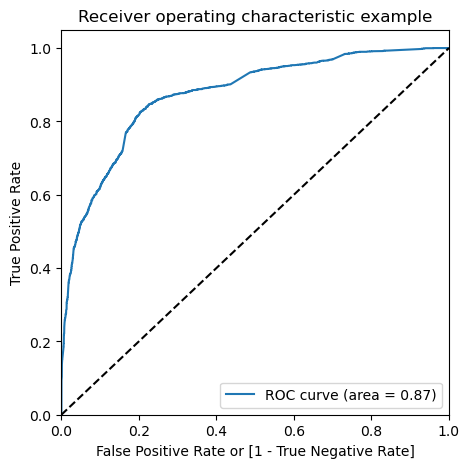

In [104]:
# Calling the ROC function:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)
plt.show()

The area under the curve of the ROC is 0.87 which is quite good. So we seem to have a good model. Let's also check the sensitivity and specificity tradeoff to find the optimal cutoff point.

In [106]:
# Let's create columns with different probability cutoffs 

numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.183713,0,1,1,0,0,0,0,0,0,0,0
1,0,0.586635,1,1,1,1,1,1,1,0,0,0,0
2,0,0.100158,0,1,1,0,0,0,0,0,0,0,0
3,1,0.834547,1,1,1,1,1,1,1,1,1,1,0
4,1,0.513451,1,1,1,1,1,1,1,0,0,0,0


In [107]:
# Let's create a dataframe to see the values of accuracy, sensitivity, and specificity at different values of probabiity cutoffs

cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.385136  1.000000  0.000000
0.1   0.1  0.544954  0.983647  0.270166
0.2   0.2  0.748229  0.883074  0.663764
0.3   0.3  0.799559  0.848324  0.769014
0.4   0.4  0.807117  0.789861  0.817926
0.5   0.5  0.794363  0.660262  0.878361
0.6   0.6  0.789954  0.576860  0.923431
0.7   0.7  0.781294  0.506132  0.953649
0.8   0.8  0.757046  0.413737  0.972087
0.9   0.9  0.711227  0.266966  0.989501


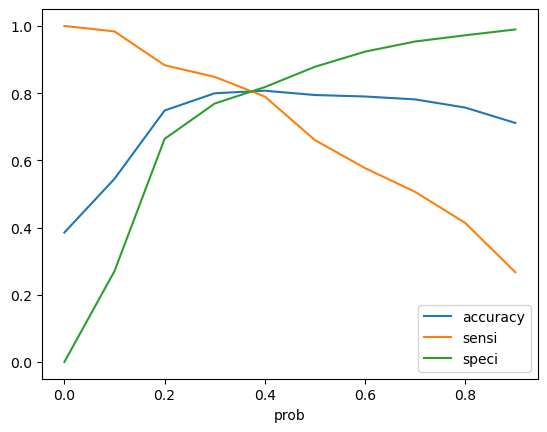

In [108]:
# Let's plot this as well:
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

As you can see that around 0.4, you get the optimal values of the three metrics. So let's choose 0.40 as our cutoff now.

In [110]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Prob.map( lambda x: 1 if x > 0.4 else 0)

y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.183713,0,1,1,0,0,0,0,0,0,0,0,0
1,0,0.586635,1,1,1,1,1,1,1,0,0,0,0,1
2,0,0.100158,0,1,1,0,0,0,0,0,0,0,0,0
3,1,0.834547,1,1,1,1,1,1,1,1,1,1,0,1
4,1,0.513451,1,1,1,1,1,1,1,0,0,0,0,1


In [111]:
# Let's check the accuracy now:
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.8071169894504803

In [112]:
# Let's create the confusion matrix once again with new predictions:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

# Calculate TP, TN, FP, FN
TP = confusion2[1, 1]  # true positive 
TN = confusion2[0, 0]  # true negatives
FP = confusion2[0, 1]  # false positives
FN = confusion2[1, 0]  # false negatives

# Print the confusion matrix
print(confusion2)

[[3194  711]
 [ 514 1932]]


In [113]:
# Calculate Sensitivity:
TP/(TP+FN)

0.7898609975470156

In [114]:
# Calculate Specificity:
TN/(TN+FP)

0.8179257362355954

This cutoff point seems pretty good to go!

### 8. Making Predictions on the Test Set

In [117]:
# Scale the test set as well using just 'transform'

X_test[['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']] = scaler.transform(
    X_test[['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']]
)

In [118]:
# Select the columns in X_train for X_test as well:
X_test = X_test[col]
X_test.head()

,Total Time Spent on Website,Lead Origin_Lead Add Form,Lead Source_Direct Traffic,Lead Source_Referral Sites,Lead Source_Welingak Website,Do Not Email_Yes,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,What is your current occupation_Housewife,What is your current occupation_Working Professional,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website
3271,0.070530,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1490,0.679695,0,1,0,0,0,0,0,0,1,0,1,0,0,0
7936,0.033243,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4216,0.000000,1,0,0,0,0,0,0,0,0,0,0,1,0,0
3830,0.073675,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [119]:
# Add a constant to X_test:
X_test_sm = sm.add_constant(X_test[col])

In [120]:
# Check X_test_sm:
X_test_sm

,const,Total Time Spent on Website,Lead Origin_Lead Add Form,Lead Source_Direct Traffic,Lead Source_Referral Sites,Lead Source_Welingak Website,Do Not Email_Yes,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,What is your current occupation_Housewife,What is your current occupation_Working Professional,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website
3271,1.0,0.070530,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1490,1.0,0.679695,0,1,0,0,0,0,0,0,1,0,1,0,0,0
7936,1.0,0.033243,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4216,1.0,0.000000,1,0,0,0,0,0,0,0,0,0,0,1,0,0
3830,1.0,0.073675,0,0,0,0,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
850,1.0,0.372417,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2879,1.0,0.264600,0,0,0,0,0,0,0,0,0,0,0,1,0,0
6501,1.0,0.599730,0,1,0,0,0,0,0,0,0,0,0,0,0,0
7155,1.0,0.231357,0,1,0,0,0,0,0,0,0,0,0,1,0,0


In [121]:
# Drop the required columns from X_test as well
X_test.drop('What is your current occupation_Housewife', axis=1, inplace=True)

In [122]:
# Make predictions on the test set and store it in the variable 'y_test_pred':
y_test_pred = res.predict(sm.add_constant(X_test))

In [123]:
y_test_pred[:10]

3271    0.161359
1490    0.616654
7936    0.161350
4216    0.777524
3830    0.161359
1800    0.734419
6507    0.432568
4821    0.100592
4223    0.959894
4714    0.100158
dtype: float64

In [124]:
# Converting y_pred to a dataframe:
y_pred_1 = pd.DataFrame(y_test_pred)

In [125]:
# Let's see the head:
y_pred_1.head()

,0
3271,0.161359
1490,0.616654
7936,0.161350
4216,0.777524
3830,0.161359


In [126]:
# Converting y_test to dataframe:
y_test_df = pd.DataFrame(y_test)

In [127]:
# Remove index for both dataframes to append them side by side:
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [128]:
# Append y_test_df and y_pred_1:
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [129]:
# Check 'y_pred_final':
y_pred_final.head()

,Converted,0
0,0,0.161359
1,1,0.616654
2,0,0.161350
3,1,0.777524
4,0,0.161359


In [130]:
# Rename the column:
y_pred_final= y_pred_final.rename(columns = {0 : 'Conversion_Prob'})

In [131]:
# Let's see the head of y_pred_final:
y_pred_final.head()

,Converted,Conversion_Prob
0,0,0.161359
1,1,0.616654
2,0,0.161350
3,1,0.777524
4,0,0.161359


In [132]:
# Now let's make predictions on the test set using 0.45 as the cutoff:
y_pred_final['final_predicted'] = y_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.4 else 0)

In [133]:
# Let's check y_pred_final:
y_pred_final.head()

,Converted,Conversion_Prob,final_predicted
0,0,0.161359,0
1,1,0.616654,1
2,0,0.161350,0
3,1,0.777524,1
4,0,0.161359,0


In [134]:
# Now let's check the overall accuracy:
metrics.accuracy_score(y_pred_final['Converted'], y_pred_final.final_predicted)

0.7719427102460521

In [135]:
confusion2 = metrics.confusion_matrix(y_pred_final['Converted'], y_pred_final.final_predicted )
confusion2

array([[1612,  122],
       [ 499,  490]], dtype=int64)

In [136]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [137]:
# Let's calculate sensitivity:
TP / float(TP+FN)

0.4954499494438827

In [138]:
# Calculate specificity:
TN / float(TN+FP)

0.9296424452133795

#### Precision - Recall View

Let's go ahead and now build a training model using the precisio - recall

In [140]:
#Looking at the confusion matrix again
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
confusion

array([[3430,  475],
       [ 831, 1615]], dtype=int64)

In [141]:
# Precision TP/TP+FP:
confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.7727272727272727

In [142]:
# Recall TP?TP+FN:
confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.6602616516762061

#### Precision and recall trade-off

In [144]:
# Importing matrixs of precison_recall_curve:
from sklearn.metrics import precision_recall_curve

In [145]:
y_train_pred_final.Converted, y_train_pred_final.Predicted

(0       0
 1       0
 2       0
 3       1
 4       1
        ..
 6346    0
 6347    1
 6348    0
 6349    0
 6350    0
 Name: Converted, Length: 6351, dtype: int64,
 0       0
 1       1
 2       0
 3       1
 4       1
        ..
 6346    0
 6347    1
 6348    1
 6349    0
 6350    0
 Name: Predicted, Length: 6351, dtype: int64)

In [146]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

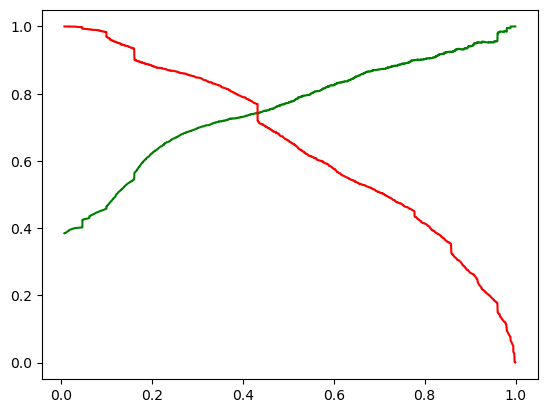

In [147]:
# ploting the thresholds:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

In [148]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.44 else 0)

y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.183713,0,1,1,0,0,0,0,0,0,0,0,0
1,0,0.586635,1,1,1,1,1,1,1,0,0,0,0,1
2,0,0.100158,0,1,1,0,0,0,0,0,0,0,0,0
3,1,0.834547,1,1,1,1,1,1,1,1,1,1,0,1
4,1,0.513451,1,1,1,1,1,1,1,0,0,0,0,1


In [149]:
# Now let's check the accuracy now:
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.7949929145016533

In [150]:
# Now let's create the confusion matrix once again:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3312,  593],
       [ 709, 1737]], dtype=int64)

In [151]:
# Let's evaluate the other metrics as well

TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [152]:
# Calculate Precision:
TP/(TP+FP)

0.7454935622317597

In [153]:
# Calculate Recall:
TP/(TP+FN)

0.7101390024529844

Looks like the cut off point seems pretty good!

### 9. Making Predictions on the Test Set:

Let's now predict on Test Set

In [156]:
# Make predictions on the test set and store it in the variable 'y_test_pred':
y_test_pred = res.predict(sm.add_constant(X_test))

In [157]:
y_test_pred[:10]

3271    0.161359
1490    0.616654
7936    0.161350
4216    0.777524
3830    0.161359
1800    0.734419
6507    0.432568
4821    0.100592
4223    0.959894
4714    0.100158
dtype: float64

In [158]:
# Converting y_pred to a dataframe:
y_pred_1 = pd.DataFrame(y_test_pred)

In [159]:
# Now let's see the head:
y_pred_1.head()

,0
3271,0.161359
1490,0.616654
7936,0.161350
4216,0.777524
3830,0.161359


In [160]:
# Now converting y_test to dataframe:
y_test_df = pd.DataFrame(y_test)

In [161]:
# Now remove index for both dataframes to append them side by side:
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [162]:
# Let's append y_test_df and y_pred_1:
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [163]:
# Now let's check 'y_pred_final':
y_pred_final.head()

,Converted,0
0,0,0.161359
1,1,0.616654
2,0,0.161350
3,1,0.777524
4,0,0.161359


In [164]:
# Renameing the column: 
y_pred_final= y_pred_final.rename(columns = {0 : 'Conversion_Prob'})

In [165]:
# Now let's see the head of y_pred_final:
y_pred_final.head()

,Converted,Conversion_Prob
0,0,0.161359
1,1,0.616654
2,0,0.161350
3,1,0.777524
4,0,0.161359


In [166]:
# Let's make predictions on the test set using 0.44 as the cutoff:
y_pred_final['final_predicted'] = y_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.44 else 0)

In [167]:
# Now let's check y_pred_final:
y_pred_final.head()

,Converted,Conversion_Prob,final_predicted
0,0,0.161359,0
1,1,0.616654,1
2,0,0.161350,0
3,1,0.777524,1
4,0,0.161359,0


In [168]:
# Now let's check the overall accuracy:
metrics.accuracy_score(y_pred_final['Converted'], y_pred_final.final_predicted)

0.731546088872567

Final accuracy looks good!
___________________________________________________